# APIs: Exploring Guardian API Data
Guardian news data provides us a range of different types of variable that we can use to get an overall picture of our datatset, and perhaps even find a some interesting patterns along the way.

Below we look at a range of different options for examining Guardian Data. Whilst the text of the stories is obviously valuable data, we'll need more advanced text analysis methods for that. These methods allow us to get a good overall picture of our data and find general trends.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
articles = pd.read_json('AI_articles.json')
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2000 non-null   object
 1   type                2000 non-null   object
 2   sectionId           2000 non-null   object
 3   sectionName         2000 non-null   object
 4   webPublicationDate  2000 non-null   object
 5   webTitle            2000 non-null   object
 6   webUrl              2000 non-null   object
 7   apiUrl              2000 non-null   object
 8   fields              2000 non-null   object
 9   tags                2000 non-null   object
 10  isHosted            2000 non-null   bool  
 11  pillarId            1980 non-null   object
 12  pillarName          1980 non-null   object
dtypes: bool(1), object(12)
memory usage: 205.1+ KB


## Prepping the Data
First we get the data ready for analysis.

### Transforming the date column
First we need to ensure that our data is clean and that the `webPublicationDate` is properly formatted as a `datetime`.

In [3]:
articles.head()


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,tags,isHosted,pillarId,pillarName
0,technology/2023/oct/31/educators-teachers-ai-l...,article,technology,Technology,2023-10-31T10:00:39Z,‘Is this an appropriate use of AI or not?’: te...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Johana Bhuiyan', 'body': '<p>In <a...","[{'id': 'technology/technology', 'type': 'keyw...",False,pillar/news,News
1,technology/ng-interactive/2023/oct/25/a-day-in...,interactive,technology,Technology,2023-10-25T13:38:11Z,A day in the life of AI,https://www.theguardian.com/technology/ng-inte...,https://content.guardianapis.com/technology/ng...,{'byline': 'Hannah Devlin Science Corresponden...,"[{'id': 'technology/artificialintelligenceai',...",False,pillar/news,News
2,technology/2023/oct/24/alphabet-q3-earnings-go...,article,technology,Technology,2023-10-24T22:07:37Z,Google Cloud revenue misses expectations despi...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Kari Paul', 'body': '<p>Google is ...","[{'id': 'technology/alphabet', 'type': 'keywor...",False,pillar/news,News
3,stage/2023/sep/19/anthropology-review-hampstea...,article,stage,Stage,2023-09-19T12:02:55Z,Anthropology review – clever AI missing-person...,https://www.theguardian.com/stage/2023/sep/19/...,https://content.guardianapis.com/stage/2023/se...,"{'byline': 'Mark Lawson', 'body': '<p>While sc...","[{'id': 'stage/stage', 'type': 'keyword', 'sec...",False,pillar/arts,Arts
4,film/2023/aug/20/tim-review-clunky-ai-paranoia...,article,film,Film,2023-08-20T10:30:44Z,TIM review – clunky AI paranoia thriller,https://www.theguardian.com/film/2023/aug/20/t...,https://content.guardianapis.com/film/2023/aug...,"{'byline': 'Wendy Ide', 'body': '<p>This styli...","[{'id': 'film/thriller', 'type': 'keyword', 's...",False,pillar/arts,Arts


In [4]:
articles['webPublicationDate'] = pd.to_datetime(articles['webPublicationDate'])

### Unpacking the Fields column
The content of the `fields` column is determined when we collect our API data, by what we passed to `show-fields` in our query parameters. However what is returned is a dictionary of information. Ideally we want to expand these dictionaries out and create additional columns for each field (`byline`, `body` and `wordcount`).

We'll mainly be using `wordcount` but the process will unpack all fields.

In [5]:
articles.loc[0, 'fields']

{'byline': 'Johana Bhuiyan',
 'body': '<p>In <a href="https://www.theguardian.com/technology/2023/oct/12/chatgpt-uses-writing-recipes-one-year">the year since OpenAI released ChatGPT</a>, high school teacher Vicki Davis has been rethinking every single assignment she gives her students. Davis, a computer science teacher at Sherwood Christian Academy in Georgia, was well-positioned to be an early adopter of the technology. She’s also the IT director at the school and helped put together an AI policy in March: the school opted to allow the use of AI tools for specific projects so long as students discussed it with their teachers and cited the tool. In Davis’s mind, there were good and bad uses of AI, and ignoring its growing popularity was not going to help students unlock the productive uses or understand its dangers.</p> <aside class="element element-rich-link element--thumbnail"> <p> <span>Related: </span><a href="https://www.theguardian.com/technology/2023/oct/26/ai-artificial-intell

`.json_normalize` happens to do this kind of job for us, but it will create an entirely new dataframe from the results.

In [6]:
articles_field_data = pd.json_normalize(articles['fields'])
articles_field_data.head()

,byline,body,wordcount
0,Johana Bhuiyan,"<p>In <a href=""https://www.theguardian.com/tec...",1585
1,"Hannah Devlin Science Correspondent, Rich Cous...","<figure class=""element element-atom element--i...",1741
2,Kari Paul,"<p>Google is doing well, but not well enough f...",554
3,Mark Lawson,"<p>While screenwriters strike, partly over the...",410
4,Wendy Ide,<p>This stylishly icy-looking thriller sounds ...,86


Having produced our dataframe of field data we just need to merge the `articles` dataframe and the new one together, matching up the indexes.
When merging dataframes, left literally refers to the dataframe on the left of the operation, and right to the one most towards the right.

`left.merge(right)`


In [7]:
articles = articles.merge(articles_field_data, left_index=True, right_index=True)
articles.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  2000 non-null   object             
 1   type                2000 non-null   object             
 2   sectionId           2000 non-null   object             
 3   sectionName         2000 non-null   object             
 4   webPublicationDate  2000 non-null   datetime64[ns, UTC]
 5   webTitle            2000 non-null   object             
 6   webUrl              2000 non-null   object             
 7   apiUrl              2000 non-null   object             
 8   fields              2000 non-null   object             
 9   tags                2000 non-null   object             
 10  isHosted            2000 non-null   bool               
 11  pillarId            1980 non-null   object             
 12  pillarName          1980 non-null 

### Converting wordcount to numeric
Wordcount has been stored as a string. We can rectify that by using `.to_numeric`

In [8]:
articles['wordcount'] = pd.to_numeric(articles['wordcount'])

## Data Counts over time
A key question of a dataset about the news, would when this news took place. Equally, we may also be interested in trends over time. Depending on your query, it may be interesting to see if there were changing publication rates related to your topic of interest.

A simple `.describe` on the date column will tell us a little about the spread of the dates.

In [9]:
articles['webPublicationDate'].describe(datetime_is_numeric=True)

count                                   2000
mean     2023-03-31 20:56:41.787000064+00:00
min                2020-08-21 14:20:31+00:00
25%      2023-01-31 11:58:43.750000128+00:00
50%                2023-05-25 13:13:57+00:00
75%      2023-08-15 11:19:21.750000128+00:00
max                2023-11-08 15:05:42+00:00
Name: webPublicationDate, dtype: object

If we want to see trends, we can group our rows by publication period such as by `D`ay, `M`onth or `Y`ear. To do this we make a special time grouping object, and then group our data using it. We count the number of articles in each group and then plot them as a line plot.

In [10]:
time_grouper = pd.Grouper(key='webPublicationDate', freq='M')
count_over_time = articles[['webPublicationDate','id']].groupby(time_grouper).count().reset_index()
count_over_time.head()

,webPublicationDate,id
0,2020-08-31 00:00:00+00:00,1
1,2020-09-30 00:00:00+00:00,0
2,2020-10-31 00:00:00+00:00,0
3,2020-11-30 00:00:00+00:00,2
4,2020-12-31 00:00:00+00:00,7


Time series are a little trickier to plot and Seaborn doesn't have a built in covnenience method for it. However we can use the `sns.lineplot` method to manually create one, and make some adjustments to size and label positioning manually.

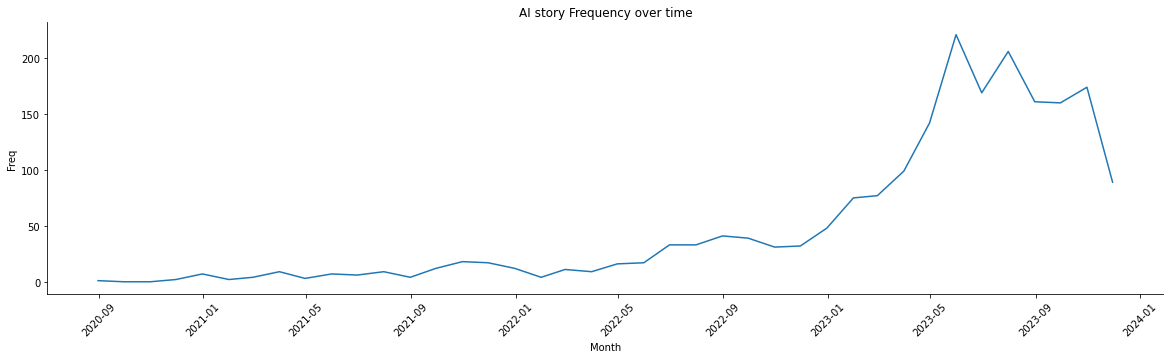

In [11]:
plt.figure(figsize=(20,5))
plot = sns.lineplot(data=count_over_time, x='webPublicationDate', y='id')

plot.tick_params(axis='x', labelrotation=45)
plot.set(title='AI story Frequency over time', xlabel='Month', ylabel='Freq')
sns.despine()
plt.show()

## Optional: Filtering by a Date Range
Using our timeseries plot we might decide to filter our data so we only work with a specific range period.

In [12]:
date_filter = articles['webPublicationDate'] >= 'January 2022'
articles = articles[date_filter]

In [13]:
articles['webPublicationDate'].describe()

<ipython-input-13-a6523f342fc1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  articles['webPublicationDate'].describe()


count                          1887
unique                         1863
top       2023-03-26 09:00:14+00:00
freq                              3
first     2022-01-09 09:00:17+00:00
last      2023-11-08 15:05:42+00:00
Name: webPublicationDate, dtype: object

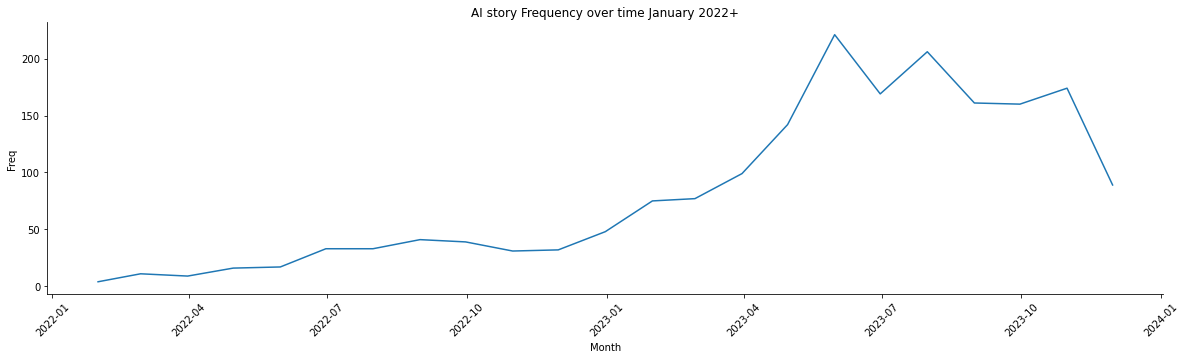

In [14]:
time_grouper = pd.Grouper(key='webPublicationDate', freq='M')
count_over_time = articles[['webPublicationDate','id']].groupby(time_grouper).count().reset_index()

plt.figure(figsize=(20,5))
plot = sns.lineplot(data=count_over_time, x='webPublicationDate', y='id')
plot.tick_params(axis='x', labelrotation=45)
plot.set(title='AI story Frequency over time January 2022+', xlabel='Month', ylabel='Freq')
sns.despine()
plt.show()

## Appropriate Pillars?
The Guardian has a number of major sections they refer to as Pillars. We can examine the distribution of our articles across these major categories.

In [15]:
pillar_counts = articles['pillarName'].value_counts()
pillar_counts


News         1072
Arts          479
Opinion       201
Lifestyle      73
Sport          42
Name: pillarName, dtype: int64

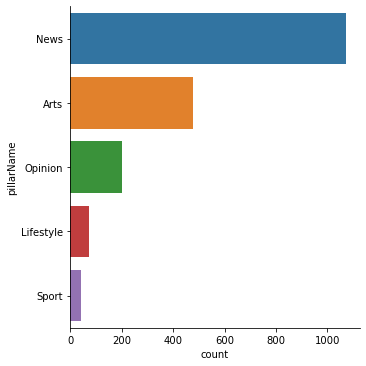

In [16]:
sns.catplot(data=articles, y='pillarName', kind='count', order=pillar_counts.index)

## Optional: Filtering by Pillar
Depending on your search query and the type of question you have, it may be worth filtering out material in unsuitable pillars, or focusing on just one.

In [17]:
chosen_pillars = ['News', 'Opinion']
pillar_filter = articles['pillarName'].isin(chosen_pillars)
articles = articles[pillar_filter]

After filtering we can re-run our counts to check the filtering was applied, and produce a new visualisation of we need it.

In [18]:
new_pillar_counts = articles['pillarName'].value_counts()
new_pillar_counts

News       1072
Opinion     201
Name: pillarName, dtype: int64

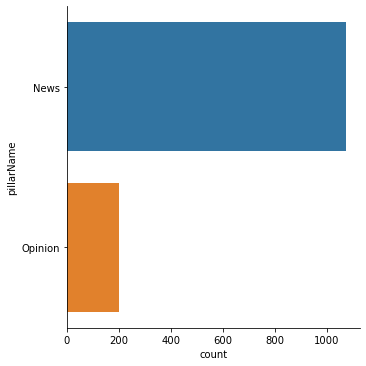

In [19]:
sns.catplot(data=articles, y='pillarName', kind='count', order=new_pillar_counts.index)

## Sections
Sections are the next form of categorisation. Sections give us a better sense of the overall topic of the stories.

In [20]:
section_counts = articles['sectionName'].value_counts()
section_counts

Technology            437
Opinion               201
Australia news        111
Business               95
World news             93
Politics               69
US news                66
Science                37
Environment            33
News                   31
Society                30
UK news                21
Media                  20
Global development     12
Education               5
From the Observer       5
Info                    4
Law                     2
Help                    1
Name: sectionName, dtype: int64

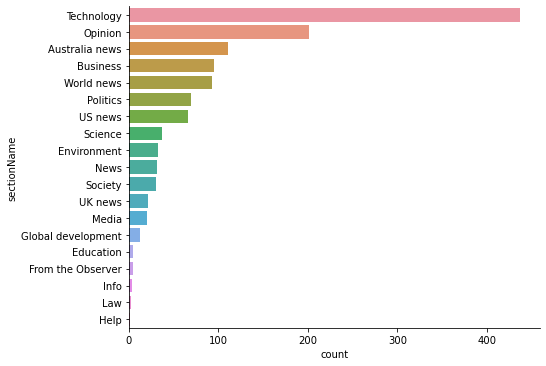

In [21]:

sns.catplot(data=articles, y='sectionName', kind='count', aspect=1.5, order=section_counts.index)


Depending on how many sections are involved we may decide to keep only those above a certain threshold of presence in our dataset. This could be a top 10 or 20, or you could base it on some sort of summary metric of the counts such as categories above the mean or median count.

In [22]:
section_counts.describe()


count     19.000000
mean      67.000000
std      102.893148
min        1.000000
25%        8.500000
50%       31.000000
75%       81.000000
max      437.000000
Name: sectionName, dtype: float64

In [23]:
above_avg_sections = section_counts[section_counts > section_counts.median()].index
above_avg_sections

Index(['Technology', 'Opinion', 'Australia news', 'Business', 'World news',
       'Politics', 'US news', 'Science', 'Environment'],
      dtype='object')

We'll just go with a top 10

In [24]:
top_sections = section_counts.index[:10]
top_sections

Index(['Technology', 'Opinion', 'Australia news', 'Business', 'World news',
       'Politics', 'US news', 'Science', 'Environment', 'News'],
      dtype='object')

In [25]:
articles = articles[articles['sectionName'].isin(top_sections)]
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1173 entries, 0 to 1997
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  1173 non-null   object             
 1   type                1173 non-null   object             
 2   sectionId           1173 non-null   object             
 3   sectionName         1173 non-null   object             
 4   webPublicationDate  1173 non-null   datetime64[ns, UTC]
 5   webTitle            1173 non-null   object             
 6   webUrl              1173 non-null   object             
 7   apiUrl              1173 non-null   object             
 8   fields              1173 non-null   object             
 9   tags                1173 non-null   object             
 10  isHosted            1173 non-null   bool               
 11  pillarId            1173 non-null   object             
 12  pillarName          1173 non-null 

### Examining Section Content
We may find interesting sections in our dataset and wonder why they're there. We can iterate through the titles and URLs of the section we're interested in to get a better sense of why they've been included.

Below is a simple section filter but you could make it more complicated, such as limiting to after a time period, or in combination with a pillar classification for example.

N.B Below we use `.head` to limit the number of results for demonstration purposes, but during analysis there is no reason you cannot remove it and to view all the results.

In [26]:

SECTION_OF_INTEREST = 'Australia news' # Just change this to switch sections


selected_data = articles[articles['sectionName'] == SECTION_OF_INTEREST].head(5)
for index, row in selected_data.iterrows():
    print(row['webTitle'])
    print(row['webUrl'])
    print('****')

Australian federal police using AI to analyse data obtained under surveillance warrants
https://www.theguardian.com/australia-news/2023/sep/22/australian-federal-police-afp-using-ai-analyse-surveillance-warrants-data
****
Morning Mail: ‘secretive’ Israel defence exports, bombshell testimony in Trump trial, AI risks debated
https://www.theguardian.com/australia-news/2023/oct/25/morning-mail-secret-israel-defence-exports-bombshell-testimony-in-trump-trial-ai-risks-debated
****
AI could ‘turbo-charge fraud’ and be monopolised by tech companies, Andrew Leigh warns
https://www.theguardian.com/australia-news/2023/sep/20/ai-artificial-intelligence-warnings-dangers-andrew-leigh-mckell-institute
****
Morning Mail: authors fear huge AI copyright ‘theft’, scorching weekend for east, Michael Gambon dies
https://www.theguardian.com/australia-news/2023/sep/29/morning-mail-authors-fear-huge-ai-copyright-theft-scorching-weekend-for-east-michael-gambon-dies
****
Democracies face ‘truth decay’ as AI blu

## Tags
Tags are the last categorisation and they give us even more nuance in exactly what each story is about. However they are a little trickier to deal with because each story can have more than one tag associated with it. This presents us more of a challenge but also an opportunity for analysis too.

If we look at the first item in our `tags` column, we can see that the value is actually a quite complex object. A `list` and then each item in the `list` is a `dictionary`. A lot of information is provided but for our purposes we just want the tag string, which is held under the `webTitle` key.

In [27]:
articles['tags'].iloc[0]

[{'id': 'technology/technology',
  'type': 'keyword',
  'sectionId': 'technology',
  'sectionName': 'Technology',
  'webTitle': 'Technology',
  'webUrl': 'https://www.theguardian.com/technology/technology',
  'apiUrl': 'https://content.guardianapis.com/technology/technology',
  'references': []},
 {'id': 'technology/artificialintelligenceai',
  'type': 'keyword',
  'sectionId': 'technology',
  'sectionName': 'Technology',
  'webTitle': 'Artificial intelligence (AI)',
  'webUrl': 'https://www.theguardian.com/technology/artificialintelligenceai',
  'apiUrl': 'https://content.guardianapis.com/technology/artificialintelligenceai',
  'references': []},
 {'id': 'education/education',
  'type': 'keyword',
  'sectionId': 'education',
  'sectionName': 'Education',
  'webTitle': 'Education',
  'webUrl': 'https://www.theguardian.com/education/education',
  'apiUrl': 'https://content.guardianapis.com/education/education',
  'references': []}]

As each story could have multiple tags we're going to create a version of the `articles` dataframe where each row represents a single tag, and other story information like title, wordcount etc are duplicated. Pandas will keep track of which rows all refer to the same story using the index.

In [28]:
tag_per_line = articles.explode('tags')
tag_per_line.head(10)

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,tags,isHosted,pillarId,pillarName,byline,body,wordcount
0,technology/2023/oct/31/educators-teachers-ai-l...,article,technology,Technology,2023-10-31 10:00:39+00:00,‘Is this an appropriate use of AI or not?’: te...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Johana Bhuiyan', 'body': '<p>In <a...","{'id': 'technology/technology', 'type': 'keywo...",False,pillar/news,News,Johana Bhuiyan,"<p>In <a href=""https://www.theguardian.com/tec...",1585
0,technology/2023/oct/31/educators-teachers-ai-l...,article,technology,Technology,2023-10-31 10:00:39+00:00,‘Is this an appropriate use of AI or not?’: te...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Johana Bhuiyan', 'body': '<p>In <a...","{'id': 'technology/artificialintelligenceai', ...",False,pillar/news,News,Johana Bhuiyan,"<p>In <a href=""https://www.theguardian.com/tec...",1585
0,technology/2023/oct/31/educators-teachers-ai-l...,article,technology,Technology,2023-10-31 10:00:39+00:00,‘Is this an appropriate use of AI or not?’: te...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Johana Bhuiyan', 'body': '<p>In <a...","{'id': 'education/education', 'type': 'keyword...",False,pillar/news,News,Johana Bhuiyan,"<p>In <a href=""https://www.theguardian.com/tec...",1585
1,technology/ng-interactive/2023/oct/25/a-day-in...,interactive,technology,Technology,2023-10-25 13:38:11+00:00,A day in the life of AI,https://www.theguardian.com/technology/ng-inte...,https://content.guardianapis.com/technology/ng...,{'byline': 'Hannah Devlin Science Corresponden...,"{'id': 'technology/artificialintelligenceai', ...",False,pillar/news,News,"Hannah Devlin Science Correspondent, Rich Cous...","<figure class=""element element-atom element--i...",1741
1,technology/ng-interactive/2023/oct/25/a-day-in...,interactive,technology,Technology,2023-10-25 13:38:11+00:00,A day in the life of AI,https://www.theguardian.com/technology/ng-inte...,https://content.guardianapis.com/technology/ng...,{'byline': 'Hannah Devlin Science Corresponden...,"{'id': 'technology/computing', 'type': 'keywor...",False,pillar/news,News,"Hannah Devlin Science Correspondent, Rich Cous...","<figure class=""element element-atom element--i...",1741
1,technology/ng-interactive/2023/oct/25/a-day-in...,interactive,technology,Technology,2023-10-25 13:38:11+00:00,A day in the life of AI,https://www.theguardian.com/technology/ng-inte...,https://content.guardianapis.com/technology/ng...,{'byline': 'Hannah Devlin Science Corresponden...,"{'id': 'technology/technology', 'type': 'keywo...",False,pillar/news,News,"Hannah Devlin Science Correspondent, Rich Cous...","<figure class=""element element-atom element--i...",1741
1,technology/ng-interactive/2023/oct/25/a-day-in...,interactive,technology,Technology,2023-10-25 13:38:11+00:00,A day in the life of AI,https://www.theguardian.com/technology/ng-inte...,https://content.guardianapis.com/technology/ng...,{'byline': 'Hannah Devlin Science Corresponden...,"{'id': 'uk/uk', 'type': 'keyword', 'sectionId'...",False,pillar/news,News,"Hannah Devlin Science Correspondent, Rich Cous...","<figure class=""element element-atom element--i...",1741
2,technology/2023/oct/24/alphabet-q3-earnings-go...,article,technology,Technology,2023-10-24 22:07:37+00:00,Google Cloud revenue misses expectations despi...,https://www.theguardian.com/technology/2023/oc...,https://content.guardianapis.com/technology/20...,"{'byline': 'Kari Paul', 'body': '<p>Google is ...","{'id': 'technology/alphabet', 'type': 'keyword...",False,pillar/news,News,Kari Paul,"<p>Google is doing well, but not well enough f...",554
2,technology/2023/oct/24/alphabet-q3-earnings-go...,article,technology,Technology,2023-10-24 22:07:37+00:00,Google Cloud revenue misses expectations despi.

If we check the length of the original `articles` dataframe against the new `tag_per_line` we can see that we have many more rows, one row per tag used in a story. We can also see the index values for our new dataframe are duplicated. This is because what was a single row, row `0` for example, is now three rows because the story had three tags. What was row `1` is now four rows, because the story at row `1` had four tags. These index values help us keep track of what rows 'go together' to  make a single story, which we'll need later. 

In [75]:
len(tag_per_line)

7666

In [76]:
len(articles)

1173

Now our `tags` column is similar in structure to our `fields` column, which we unpacked earlier using `.json_normalize`. We can do the same again to generate a seperate dataframe of `tag_data`.

In [79]:
tag_data = pd.json_normalize(tag_per_line['tags'])
tag_data = tag_data.set_index(tag_per_line.index)


Our `tag_data` dataframe is the same length as the `tag_per_line` dataframe because it is just the result of us unpacking a single column of `tag_per_line`. What each row represents stays the same even though the unpacking generated a lot more columns. We lost our 

Rather than merge the new data back into its source dataframe, like we did when we unpacked fields, we'll take the `wordcount` column, turn it into a list and set those values as the values for our new column. Not turning it into a list causes issues because the `tag_data` dataframe and the `tag_per_line` dataframe have different indexes. `.tolist()` bypasses the problem.

We'll do the same with the `webTitle` column from `tag_per_line` but we'll set it to a new column name, `article_title` because in our `tag_data` dataframe `webTitle` is already in use to refer to the name of the tag (unhelpful API!). 

We also want the web url so we may as well make that an easier column name so we'll do the same copying over `webUrl` from the `tag_per_line` to a new column called `article_url`.

In [80]:
tag_data['wordcount'] = tag_per_line['wordcount']
tag_data['article_title'] = tag_per_line['webTitle']
tag_data['article_url'] = tag_per_line['webUrl']
tag_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7666 entries, 0 to 1997
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  7637 non-null   object
 1   type                7637 non-null   object
 2   sectionId           7614 non-null   object
 3   sectionName         7614 non-null   object
 4   webTitle            7637 non-null   object
 5   webUrl              7637 non-null   object
 6   apiUrl              7637 non-null   object
 7   references          7637 non-null   object
 8   description         391 non-null    object
 9   activeSponsorships  2 non-null      object
 10  wordcount           7666 non-null   int64 
 11  article_title       7666 non-null   object
 12  article_url         7666 non-null   object
dtypes: int64(1), object(12)
memory usage: 838.5+ KB


Two jobs left.
1. Later we're going to want to match up each row with its original story easily and be certain which rows go together as they are all tags associated with a single story.
2. We have quite a lot of columns in this dataset we've made, and probably only need a few.

First job - Remember our tag per line index has duplicate values, because each row represents a tag within a single story. A story may have multiple tags so each story may have multiple rows. The original index values from our `articles` dataset are duplicated to show us, for example that the first three rows of our `tag_per_line` data all refer to the same story.

In [82]:

tag_data = tag_data[['webTitle','article_title','article_url','wordcount']]
tag_data.head()

,webTitle,article_title,article_url,wordcount
0,Technology,‘Is this an appropriate use of AI or not?’: te...,https://www.theguardian.com/technology/2023/oc...,1585
0,Artificial intelligence (AI),‘Is this an appropriate use of AI or not?’: te...,https://www.theguardian.com/technology/2023/oc...,1585
0,Education,‘Is this an appropriate use of AI or not?’: te...,https://www.theguardian.com/technology/2023/oc...,1585
1,Artificial intelligence (AI),A day in the life of AI,https://www.theguardian.com/technology/ng-inte...,1741
1,Computing,A day in the life of AI,https://www.theguardian.com/technology/ng-inte...,1741


We can now check the count frequency of the different tags to get an overall picture like we did with sections.

In [83]:
tag_counts = tag_data['webTitle'].value_counts().head(20)
top_tags = tag_counts.index
tag_counts

Technology                      633
Artificial intelligence (AI)    560
Computing                       366
UK news                         307
Business                        214
World news                      211
US news                         211
Politics                        166
Australia news                  150
ChatGPT                         147
Science                         125
Consciousness                   105
Rishi Sunak                     100
Google                           92
Media                            73
Environment                      65
Chatbots                         63
Internet                         62
Elon Musk                        58
Conservatives                    55
Name: webTitle, dtype: int64

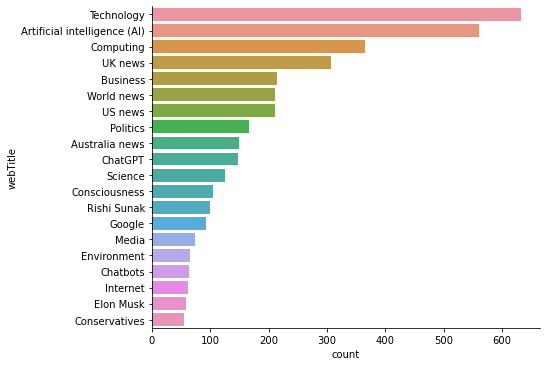

In [84]:
sns.catplot(data=tag_data, y='webTitle', kind='count', aspect=1.5, order=top_tags)


## Titles by Tag
Like before with sections, we can examine what stories are associated with each tag. The column names will be different but the mechanics are the same.
N.B Below we use `.head` to limit the number of results for demonstration purposes, but during analysis there is no reason you cannot remove it and to view all the results.

In [85]:

TAG_OF_INTEREST = 'Elon Musk' # Just change this to switch tags


selected_data = tag_data[tag_data['webTitle'] == TAG_OF_INTEREST].head()

for index, row in selected_data.iterrows():
    print(row['article_title'])
    print(row['article_url'])
    print('****')

Five takeaways from UK’s AI safety summit at Bletchley Park
https://www.theguardian.com/technology/2023/nov/02/five-takeaways-uk-ai-safety-summit-bletchley-park-rishi-sunak
****
Balancing the risks and rewards of AI will be key | Letters
https://www.theguardian.com/technology/2023/nov/06/balancing-the-risks-and-rewards-of-ai-will-be-key
****
‘Bletchley made me more optimistic’: how experts reacted to AI summit 
https://www.theguardian.com/technology/2023/nov/03/bletchley-made-me-more-optimistic-how-experts-reacted-to-ai-summit
****
Sunak plays eager chatshow host as Musk discusses AI and politics
https://www.theguardian.com/politics/2023/nov/02/sunak-plays-eager-chatshow-host-as-musk-discusses-ai-and-politics
****
Elon Musk unveils Grok, an AI chatbot with a ‘rebellious streak’
https://www.theguardian.com/technology/2023/nov/05/elon-musk-unveils-grok-an-ai-chatbot-with-a-rebellious-streak
****


We will use this data more later when examining wordcounts, and looking at tag correlation. 

## Word Counts

### By Section
We defined `top_sections` earlier when we checked which sections had the highest number of stories. Here we'll use `.groupby` to get per section and per tag wordcounts. Word count is a good proxy for how much time was dedicated to a particular topic.

Total word count tells us the overall time dedicated to the topic related to each section or topic, whilst taking an average tells us how much space was given per story.

In [86]:
section_wordcounts = articles.groupby('sectionName').agg(
    avg_wordcount=('wordcount','mean'),
    total_wordcount=('wordcount','sum')
).sort_values('total_wordcount', ascending=False).loc[top_sections]

section_wordcounts

,avg_wordcount,total_wordcount
Technology,854.544622,373436
Opinion,905.955224,182097
Australia news,2039.099099,226340
Business,1412.684211,134205
World news,1616.053763,150293
Politics,2216.072464,152909
US news,1786.863636,117933
Science,917.540541,33949
Environment,874.878788,28871
News,267.451613,8291


We can use box plots to see the distribution of these word counts. Remember we already filtered the `articles` data so it only included stories in top sections, however we include the filtering here to clarify that it is necessary before visualisation to reduce visual clutter.

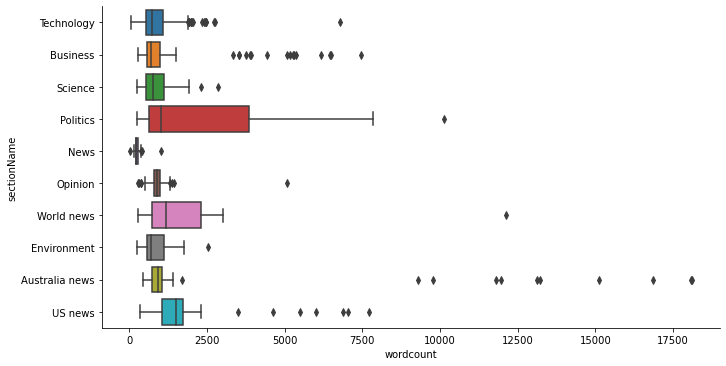

In [87]:
to_plot = articles[articles['sectionName'].isin(top_sections)]
sns.catplot(data=to_plot, y='sectionName', x='wordcount', kind='box', aspect=2)

### By Tag
For a similar summary, but by tag, we do the same, but we use the `tag_data` dataframe, and the `webTitle` column.

In [88]:
tag_data.groupby('webTitle').agg(
    avg_wordcount=('wordcount','mean'),
    total_wordcount=('wordcount','sum')
).sort_values('total_wordcount', ascending=False).loc[top_tags]

,avg_wordcount,total_wordcount
Technology,908.581359,575132
Artificial intelligence (AI),977.994643,547677
Computing,949.975410,347691
UK news,1153.117264,354007
Business,1263.654206,270422
World news,1004.488152,211947
US news,1245.033175,262702
Politics,1471.198795,244219
Australia news,1749.940000,262491
ChatGPT,849.571429,124887


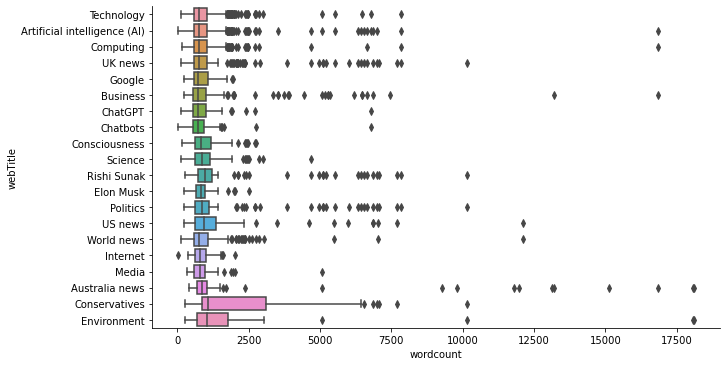

In [49]:
to_plot = tag_data[tag_data['webTitle'].isin(top_tags)]
sns.catplot(data=to_plot, y='webTitle', x='wordcount', kind='box', aspect=2)

## Tag Correlation
One analysis technique that is available to us is to examine the correlation of tags. What tags tend to co-occur in single stories, could this give us a sense of the themes or intersection of different topics?

Here we'll create a matrix of tag counts. In the first stage we use `.get_dummies` to reshape our column of tag names so that each possible tag is given its own column, and a value of 1 is entered if that tag is present in the row, otherwise 0. 

(This may be a little confusing now but we're heading somewhere!)

In [89]:
tag_matrix = pd.get_dummies(tag_data['webTitle'])
tag_matrix


,3D,A-levels,AT&T,Abortion,Academics,Accountancy,Acting,Activism,Adam Bandt,Adobe,...,YouTube,Young people,Youth unemployment,Yuval Noah Harari,Yvette Cooper,Zambia,Zoology,iOS,iPad,iPhone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next we take our `tag_matrix`, use our list of `top_tags` to ensure only columns representing our selected top tags remain. We do this to aid visualisation later.

In [90]:

tag_matrix = tag_matrix[top_tags].copy()
tag_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7666 entries, 0 to 1997
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Technology                    7666 non-null   uint8
 1   Artificial intelligence (AI)  7666 non-null   uint8
 2   Computing                     7666 non-null   uint8
 3   UK news                       7666 non-null   uint8
 4   Business                      7666 non-null   uint8
 5   World news                    7666 non-null   uint8
 6   US news                       7666 non-null   uint8
 7   Politics                      7666 non-null   uint8
 8   Australia news                7666 non-null   uint8
 9   ChatGPT                       7666 non-null   uint8
 10  Science                       7666 non-null   uint8
 11  Consciousness                 7666 non-null   uint8
 12  Rishi Sunak                   7666 non-null   uint8
 13  Google                        766

At the moment our `tag_matrix` is one row per tag per story, meaning that for every row *only one* of those columns will have a number 1 in it to represent a tag is associated with that story. In order to understand if certain tags correlate, if they go together, we need to simplify so that one row represents a story, and each column shows either a 0 or a 1 depending on whether the tag is present in that story.

As stories can only use each tag once if we took all the rows for one single story, and for each column added the row values together, the result would be one row where 1 indicates if the tag is there or not because if it's not, we'd simply be adding together 0 for each row, resulting in 0. Using `groupby` we can grab each set of rows representing a single story, `.sum()` together the values in each column and then get one row back which provides this representation.

Let's demo this with a simplified example...

In [111]:
toy_matrix = pd.read_csv('toy_matrix.csv')
toy_matrix

,story,tag1,tag2,tag3
0,A,1,0,0
1,A,0,1,0
2,A,0,0,1
3,B,1,0,0
4,B,0,0,1


The `story` column just represents the id or title of the story, and then we have a column for each of three different tags. You'll see that each row only has one `1` in it because it is one row per tag. What we want is one row per story, so just two rows, one for story A, one for story B that puts the values spread across multiple rows into just one row.

You could probably do this in your head because really all we're saying is, for each story's subset of rows, if there is a `1` anywhere in the column, then the value is `1`, otherwise it's `0`. As we know a single story can only use a tag once, we can simplify this slightly complicated logic as just "grab all the rows for a story and for each column, add the values together".

In [112]:
toy_matrix.groupby('story').sum()

,tag1,tag2,tag3
story,,,
A,1,1,1
B,1,0,1


We can do the same with our actual `tag_matrix`. As we want to group on the index of the dataframe rather than a column we don't have a column name to pass `.groupby()` as usual. However we can tell it to group by "level 0". Pandas refers to indexes as levels and on a regular dataframe with just a single index, there is only one level, level 0.

In [113]:
tag_matrix = tag_matrix.groupby(level=0).sum()
tag_matrix


,Technology,Artificial intelligence (AI),Computing,UK news,Business,World news,US news,Politics,Australia news,ChatGPT,Science,Consciousness,Rishi Sunak,Google,Media,Environment,Chatbots,Internet,Elon Musk,Conservatives
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1992,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Finally we can get our correlation scores using `.corr`. This reshapes the data into a square, where both the rows and the columns represent tags, and the values represent the correleation between the two tags.

- 0 Represents no correlation
- 1 Represents the highest positive correlation, i.e. every story with tag `a` also includes tag `b`. 
- A negative value indicates negative correlation, i.e. the presence of tag `a` means that the presence of tag `b` is less likely.

The 'diagnonal' of the matrix will always equal 1 as the presence of tag `a` will always be correlated with the presence of tag `a`.

In [114]:
correlations = tag_matrix.corr()
correlations

,Technology,Artificial intelligence (AI),Computing,UK news,Business,World news,US news,Politics,Australia news,ChatGPT,Science,Consciousness,Rishi Sunak,Google,Media,Environment,Chatbots,Internet,Elon Musk,Conservatives
Technology,1.000000,0.574604,0.533412,0.016848,0.019890,0.098574,0.000604,-0.105899,-0.266054,0.266949,0.167821,0.253656,-0.061030,0.205829,0.103413,-0.157571,0.182106,0.157034,0.163318,-0.191595
Artificial intelligence (AI),0.574604,1.000000,0.605133,0.044402,-0.101796,0.050066,-0.052139,0.013467,-0.161559,0.349627,0.188183,0.328054,0.056591,0.171906,-0.006011,-0.119598,0.226543,-0.019828,0.041806,-0.074742
Computing,0.533412,0.605133,1.000000,0.034365,-0.055770,0.101387,-0.085447,0.001080,-0.180739,0.295293,0.224587,0.414030,0.018436,0.159426,-0.036388,-0.106816,0.206844,0.038279,0.050099,-0.105850
UK news,0.016848,0.044402,0.034365,1.000000,0.099823,0.008971,-0.066770,0.531680,-0.210569,-0.067208,0.020464,0.003527,0.380777,-0.051062,-0.040989,-0.076394,-0.038613,-0.001966,-0.019501,0.280779
Business,0.019890,-0.101796,-0.055770,0.099823,1.000000,0.008604,0.077179,-0.045873,-0.081274,-0.031944,-0.139635,-0.108836,-0.041216,0.099730,0.051625,-0.046611,-0.014542,0.075426,-0.026135,-0.083416
World news,0.098574,0.050066,0.101387,0.008971,0.008604,1.000000,0.150511,-0.043685,-0.139455,0.043962,0.060710,0.039749,-0.007853,0.020235,-0.019582,0.022389,0.036109,-0.001514,-0.014672,-0.082877
US news,0.000604,-0.052139,-0.085447,-0.066770,0.077179,0.150511,1.000000,-0.094629,-0.166041,0.003738,-0.081887,-0.069098,-0.039646,0.036747,0.017169,-0.084329,-0.032810,-0.041194,0.046756,-0.072377
Politics,-0.105899,0.013467,0.001080,0.531680,-0.045873,-0.043685,-0.094629,1.000000,-0.155470,-0.109358,-0.013275,-0.015930,0.603007,-0.100251,-0.043847,-0.034195,-0.075029,-0.074050,0.008935,0.523148
Australia news,-0.266054,-0.161559,-0.180739,-0.210569,-0.081274,-0.139455,-0.166041,-0.155470,1.000000,-0.067837,-0.114677,-0.120065,-0.116898,-0.064233,-0.077510,0.018835,-0.091226,-0.044820,-0.075559,-0.084931
ChatGPT,0.266949,0.349627,0.295293,-0.067208,-0.031944,0.043962,0.003738,-0.109358,-0.067837,1.000000,0.093756,0.224059,-0.106333,0.186482,-0.001581,-0.069170,0.321008,0.048682,-0.003190,-0.083955


We can check the correlations for a specific tag by accessing its column...

In [115]:
correlations['ChatGPT'].sort_values(ascending=False)

ChatGPT                         1.000000
Artificial intelligence (AI)    0.349627
Chatbots                        0.321008
Computing                       0.295293
Technology                      0.266949
Consciousness                   0.224059
Google                          0.186482
Science                         0.093756
Internet                        0.048682
World news                      0.043962
US news                         0.003738
Media                          -0.001581
Elon Musk                      -0.003190
Business                       -0.031944
UK news                        -0.067208
Australia news                 -0.067837
Environment                    -0.069170
Conservatives                  -0.083955
Rishi Sunak                    -0.106333
Politics                       -0.109358
Name: ChatGPT, dtype: float64

### Tag Heatmap
We can also visualise these correlations using a heatmap. Using the `coolwarm` color scheme means colours run from deep blue to deep red. We set the `center` of the scale to 0 so that above zero, positive correlation, is a shade of red whilst below zero, negative correlation, is a shade of blue.

<AxesSubplot:>

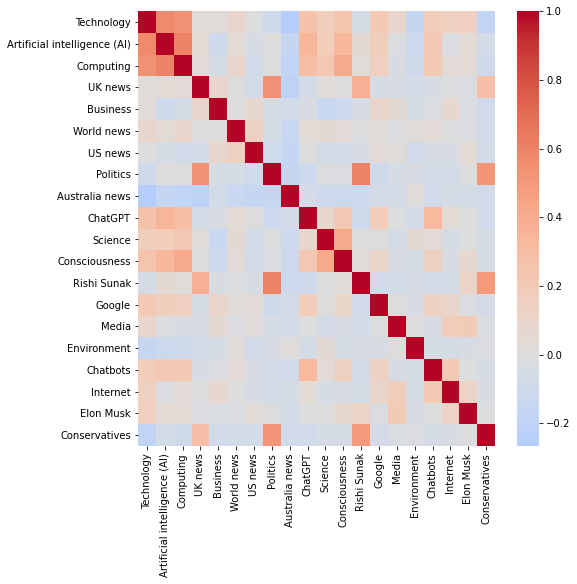

In [66]:
plt.figure(figsize=(8,8))

sns.heatmap(correlations, cmap='coolwarm', center=0)

### Advanced: Identifying multi-tag titles
What if you wanted to understand WHY two tags correlate. Perhaps ones that are unexpected. You will need to identify which stories have both tags using our `tag_matrix`, and then use the index values to look up the correct rows in the `articles`. We can then iterate over them and view title and url like before.

In [67]:
TAG_1 = 'ChatGPT'
TAG_2 = 'Consciousness'
tag_filter = (tag_matrix[TAG_1] == 1) & (tag_matrix[TAG_2] == 1)

selected_story_index = tag_matrix[tag_filter].index
selected_story_index

Int64Index([  74,  102,  171,  181,  206,  207,  212,  225,  270,  299,  317,
             342,  352,  424,  446,  460,  477,  478,  512,  524,  530,  563,
             578,  670,  759,  768,  788,  793,  796,  804,  908,  945,  967,
             975,  981, 1049, 1077, 1187],
           dtype='int64', name='story_index')

In [68]:
selected_data = articles.loc[selected_story_index].head()

for index, row in selected_data.iterrows():
    print(row['webTitle'])
    print(row['webUrl'])
    print('****')

AI doomsday warnings a distraction from the danger it already poses, warns expert
https://www.theguardian.com/technology/2023/oct/29/ai-doomsday-warnings-a-distraction-from-the-danger-it-already-poses-warns-expert
****
AI watch: from deepfakes to a rock star humanoid
https://www.theguardian.com/technology/2023/jul/07/ai-watch-deepfakes-humanoid-robot-artificial-intelligence
****
Instead of banning AI, schools should use it to enhance learning | Letters
https://www.theguardian.com/technology/2023/jul/09/instead-of-banning-ai-schools-should-use-it-to-enhance-learning
****
The professor’s great fear about AI? That it becomes the boss from hell
https://www.theguardian.com/technology/2023/aug/25/ai-artificial-intelligence-michael-wooldridge-christmas-royal-institution-lectures
****
The existential threat from AI – and from humans misusing it | Letters
https://www.theguardian.com/technology/2023/jun/02/the-existential-threat-from-ai-and-from-humans-misusing-it
****


## Summary
There will be many other ways in which this kind of data can be explored, depending on the kind of question you might have. However the above techniques give us a good overview of the data including the time period covered, the top topics, the type of content that has been collected (news, sport, opinion etc.) and allows us to get a sense of some correlations of the topics.

## Exercises
Explore your own data set from the Guardian API. Use the techniques above to get a better sense of what you've collected. 